In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu
from skimage.morphology import convex_hull_image

In [11]:
img = cv2.imread('Data/CHP/1/img020.bmp', cv2.IMREAD_COLOR)
print(img.shape)

(378, 378, 3)


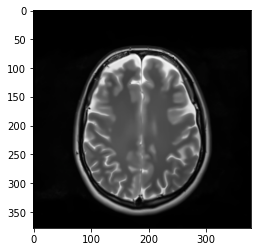

In [12]:
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.imshow(dst)

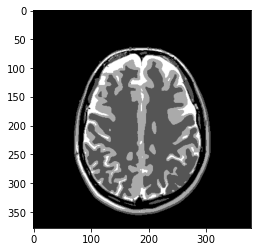

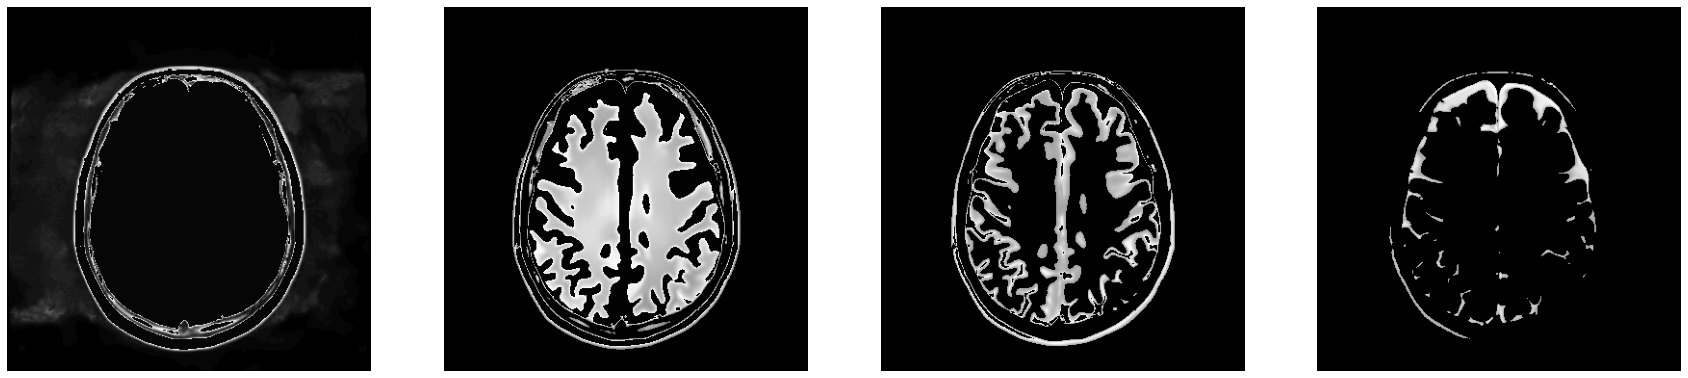

In [62]:
numUmbrales = 4
dstGray = cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)
umbrales = threshold_multiotsu(dstGray,numUmbrales)
regions = np.digitize(dstGray,bins=umbrales)

plt.imshow(regions,cmap="gray")

figura=plt.figure(figsize = (30,30))
for i in range(numUmbrales):
    imgBinaria = dstGray.copy()
    umbralesAux = np.append(0,umbrales)
    umbralesAux = np.append(umbralesAux,255)
    imgBinaria[imgBinaria<=umbralesAux[i]]=0
    imgBinaria[imgBinaria>umbralesAux[i+1]]=1

    figura.add_subplot(1, numUmbrales, i+1)
    plt.imshow(imgBinaria,cmap="gray")
    plt.axis("off")